# Introduction
The aim of this project is to build a sentiment analysis model which will allow us to categorize words based on their sentiments, that is whether they are positive, negative and also the magnitude of it.

Sentiment Analysis is a process of extracting opinions that have different polarities. By polarities, we mean positive, negative or neutral. It is also known as opinion mining and polarity detection. With the help of sentiment analysis, you can find out the nature of opinion that is reflected in documents, websites, social media feed, etc. Sentiment Analysis is a type of classification where the data is classified into different classes. These classes can be binary in nature (positive or negative) or, they can have multiple classes (happy, sad, angry, etc.).

# Package Installations and Setting the Working Directory

In [1]:
#install.packages(c("janeaustenr", "tidyr", "stringr", "tidytext", "dplyr", "tidyr", "ggplot2", "reshape2", "wordcloud"))
#setwd("C:\\Users\\priyesh143128\\Documents\\20191125_GitHub_Repository_Projects")

# Loading the main Libraries reuired

In [2]:
suppressMessages(library(janeaustenr, quietly = TRUE))
suppressMessages(library(stringr, quietly = TRUE))
suppressMessages(library(tidytext, quietly = TRUE))
suppressMessages(library(dplyr, quietly = TRUE))

1. suppressMessages() is used to avoid printing the default messages during loading the libraries.
2. The janeaustenr package will provide us with the textual data in the form of books authored by the novelist Jane Austen. 
3. Tidytext will allow us to perform efficient text analysis on our data.
4. dplyr is used for data manipulation. For using functions like group_by, %>%, etc.
5. stringr is used for functions like str_detect() which detects the presence or absence of a pattern in a string and 
   regex() which Control matching behaviour with modifier functions.

# Data Maipulation

In [3]:
tidy_data <- austen_books() %>% 
# austen_books contains a dataframe where each row has a line from the book of Jane Austen and name of the book it belongs to. 
  group_by(book) %>% # grouping the data by book name from the column book
  mutate(linenumber = row_number(), # assigning line number to each row irrespective of book name
         chapter = cumsum(str_detect(text, regex("^chapter [\\divxlc]",
                                                 ignore_case = TRUE)))) %>%
# regex detecting if the line contains word "chapter(space)"" followed by a valid roman numeral 
# and str_detect check if the expression match.
# cumsum() is used for cumalative sum. Every time it detects a match, it increases the value by one for each book.
  ungroup() %>% # Ungrouping the data grouped by books.
  unnest_tokens(word, text) # unnest_token breaks each line and adds new column all the words.

In [4]:
head(get_sentiments("bing"),15)

word,sentiment
<chr>,<chr>
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative
abomination,negative
abort,negative
aborted,negative


In [5]:
positive_senti <- get_sentiments("bing") %>% # getting sentiments from "bing" lexicon
  filter(sentiment == "positive") # filtering only the positive sentiments

In [6]:
head(tidy_data %>%
  filter(book == "Emma") %>% # filtering data for book Emma
  semi_join(positive_senti) %>% 
# semi_join() will filter out the rows with words from tidy_data for book emma which are present in positive_senti dataset
  count(word, sort = TRUE), 10) # # this will give a count of number of times those words occured

Joining, by = "word"



word,n
<chr>,<int>
well,401
good,359
great,264
like,200
better,173
enough,129
happy,125
love,117
pleasure,115


In [7]:
library(tidyr)
bing <- get_sentiments("bing")
Emma_sentiment <- tidy_data %>%
  inner_join(bing) %>%
  count(book = "Emma" , index = linenumber %/% 80, sentiment) %>% # created blocks of 80 words
  spread(sentiment, n, fill = 0) %>% # used to segregate positive and negative sentiments
  mutate(sentiment = positive - negative) # calculated the total sentiment

Joining, by = "word"



# Visualization

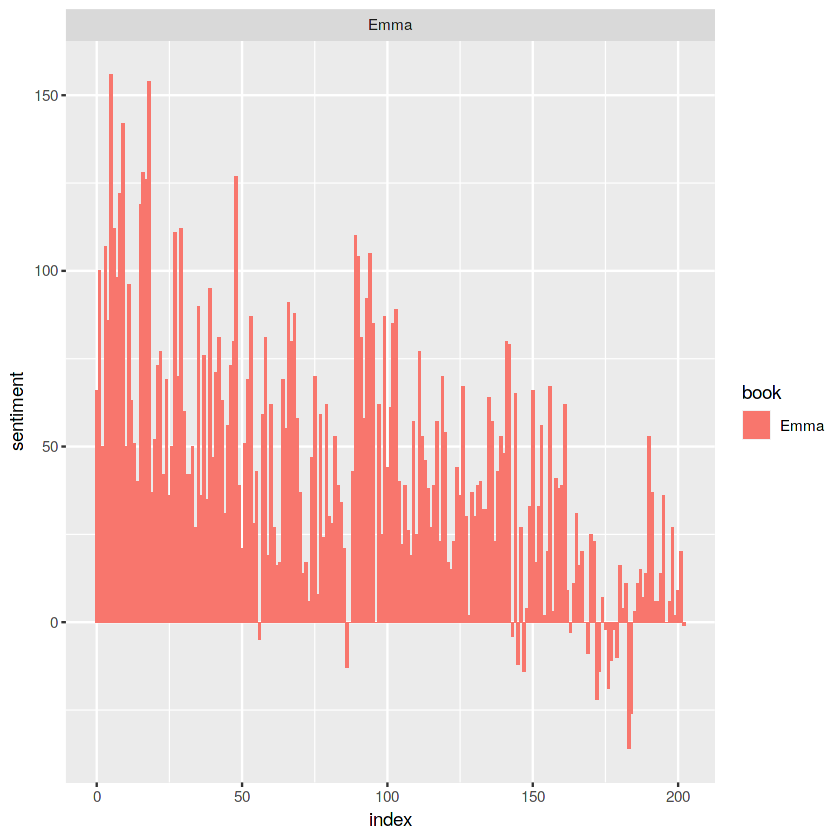

In [8]:
library(ggplot2)

ggplot(Emma_sentiment, aes(index, sentiment, fill = book)) +
  geom_bar(stat = "identity", show.legend = TRUE) +
  facet_wrap(~book, ncol = 2, scales = "free_x")

In [9]:
# counting the most common positive and negative words that are present in the novel
counting_words <- tidy_data %>%
  inner_join(bing) %>%
  count(word, sentiment, sort = TRUE)
head(counting_words)

Joining, by = "word"



word,sentiment,n
<chr>,<chr>,<int>
miss,negative,1855
well,positive,1523
good,positive,1380
great,positive,981
like,positive,725
better,positive,639


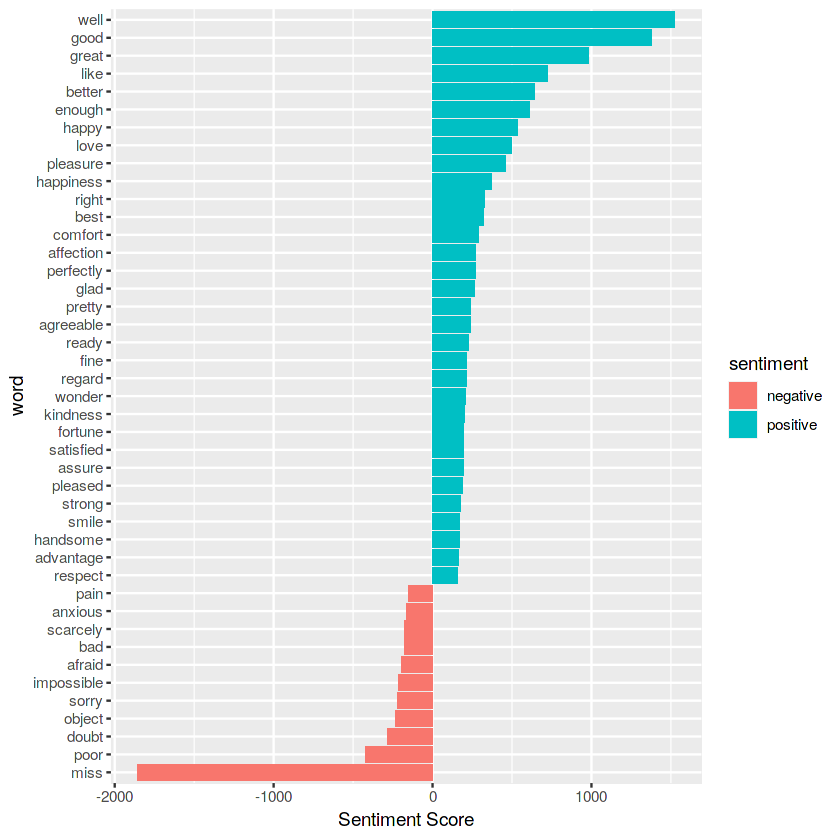

In [10]:
counting_words %>%
  filter(n > 150) %>%
  mutate(n = ifelse(sentiment == "negative", -n, n)) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = sentiment))+
  geom_col() +
  coord_flip() +
  labs(y = "Sentiment Score")


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Joining, by = "word"



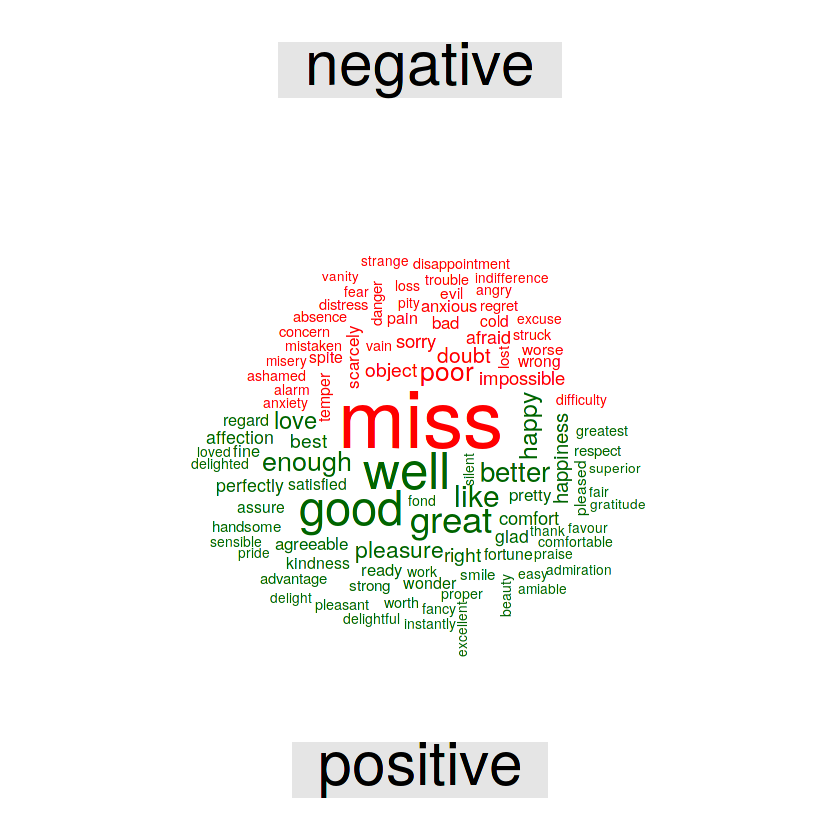

In [11]:
# Created a wordcloud that will delineate the most recurring positive and negative words
library(reshape2, quietly = TRUE)
library(wordcloud, quietly = TRUE)
tidy_data %>%
  inner_join(bing) %>%
  count(word, sentiment, sort = TRUE) %>%
  acast(word ~ sentiment, value.var = "n", fill = 0) %>%
  comparison.cloud(colors = c("red", "dark green"),
                   max.words = 100)

## Reference:
1. [Sentiment Analysis Project in R](https://data-flair.training/blogs/data-science-r-sentiment-analysis-project/)
-  [regex //divxlc in text analysis](https://stackoverflow.com/questions/48731076/regex-divxlc-in-text-analysis-in-r-book-code)

